
## 3D Surface plot (Biproduct vs Time and HCl(eq.))
3D surface plot for Hanne Svergja's Master thesis: *"Anilines in acid catalyzed amination with 4-chloro-7H-pyrrolo[2,3-d]pyrimidine"*.


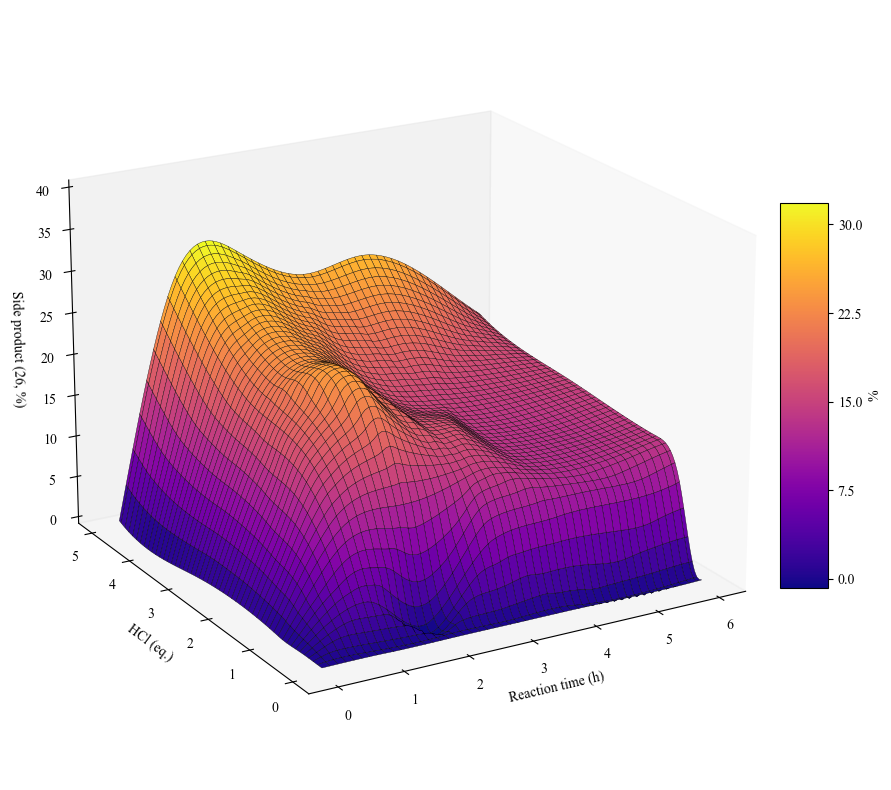

In [20]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate

# Define the number of array splits for the 'biprod' column
n = 6 

# Read the CSV file and select relevant columns
# Replace missing values with zero
df = pd.read_csv('rx_data.csv', delimiter=';', decimal=',', 
                 usecols=['molfrak. Pp', 'biprod', 'HCl (eq.) EtOH']).replace(np.nan, 0)

# Split the 'biprod' column into 'n' equally sized arrays
# Transform the list of arrays into a NumPy array for future operations
bp = np.array([np.array_split(df['biprod'].to_numpy(), n)])

# Define HCl equivalents and reaction time arrays
eq = np.array([0, 0.1, 0.5, 1, 3, 5])
t = np.array([0, 1, 2, 3, 4, 6])

# Create a 2D grid of HCl equivalents and reaction times
T, EQ = np.meshgrid(t, eq)

# Define new, more detailed arrays for HCl equivalents and reaction times
tnew = np.linspace(0, 6, 100)
eqnew = np.linspace(0, 5, 100)

# Create a 2D grid of the new HCl equivalents and reaction times
tnew, eqnew = np.meshgrid(tnew, eqnew)

# Perform cubic interpolation of 'biprod' onto the new grid
znew = interpolate.griddata((T.flatten(), EQ.flatten()), bp.flatten(), 
                            (tnew, eqnew), method='cubic')

# Set the font style for the plot
plt.rcParams["font.family"] = "Times New Roman"

# Define the color style for the 3D surface plot
c_style = 'plasma'

# Create a new figure with 3D subplot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))

# Generate the 3D surface plot
hs_plott = ax.plot_surface(tnew, eqnew, 100*znew, cmap=c_style, edgecolor='k', 
                           linewidth=0.25, alpha=1, antialiased=True, shade=True)

# Add a color bar to the figure
cbar = fig.colorbar(hs_plott, shrink=0.5, aspect=8, pad=0, 
                    ticks=np.linspace(0, 30, 5, endpoint=True))

# Set ticks and label for the color bar
cbar.set_ticks(np.linspace(0, 30, 5, endpoint=True))
cbar.set_label('%')

# Set labels for the x, y, and z axes
ax.set_xlabel('Reaction time (h)')
ax.set_ylabel('HCl (eq.)')
ax.set_zlabel('Side product (26, %)')

# Set the limit for the z axis
ax.set_zlim(0, 40)

# Set the initial viewing angle
ax.view_init(20, -120)

# Turn off the grid
ax.grid(False)

# Adjust the padding around the plot
plt.tight_layout()

# Display the plot
plt.show()

# Save the figure as a high-resolution PNG file
fig.savefig('surfaceplot_MH.png', dpi=400, bbox_inches='tight')
